# Import Datasets
Start by importing the 'Autism_Dataset.csv' file into a Pandas dataframe and take a look at it.

In [462]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


# Pretty display for notebooks
%matplotlib inline


data = pd.read_csv('Autism_Dataset.csv')
data.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


###### Here I evaluate whether the data needs cleaning; your model is only as good as the data it's given.

In [545]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,0.721195,0.453770,0.456615,0.495021,0.497866,0.284495,0.416785,0.648649,0.322902,0.573257,4.870555
std,0.448731,0.498213,0.498469,0.500331,0.500351,0.451495,0.493378,0.477732,0.467918,0.494956,2.500490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


# Add missing data to ethnicity , relation features

In [463]:
columns_dont_want = ["relation","ethnicity","Class_ASD"]
select = [x for x in data.columns if x not in columns_dont_want]

y = data.loc[:,"relation"]
X = data.loc[:, select]
X_numaric = X.select_dtypes(include=[np.number])
X_numaric.head()

le = preprocessing.LabelEncoder()
X_labelencoder = X.select_dtypes(include=[object]).apply(le.fit_transform).values

#Apply one hot encoding to create vector
X_ohe = preprocessing.OneHotEncoder()
X_ohe.fit(X_labelencoder)
X_onehotlabels = X_ohe.transform(X_labelencoder).toarray()

y = y.values
X = X_onehotlabels
X = np.hstack((X,X_numaric))

In [464]:
x_relationTest = []
y_relationTest = []
x_relationData = []
y_relationData = []
for xi,yi in zip(X,y):
    if(yi=='?'):
        x_relationTest.append(xi)
        y_relationTest.append(yi)
    else:
        x_relationData.append(xi)
        y_relationData.append(yi)
y_relationData = np.array(y_relationData)
x_relationData = np.array(x_relationData)
x_relationTest = np.array(x_relationTest)
y_relationTest = np.array(y_relationTest)

# Running Random Forest Classifier to fill Relation MISSING VALUES 

In [465]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5, min_samples_split=10, max_depth =15)
rfc.fit(x_relationData,y_relationData)
valYPredicted = rfc.predict(x_relationData)
print('Accuracy of Training data: %.2f' %accuracy_score(y_relationData, valYPredicted))

Accuracy of Training data: 0.88


In [466]:
valuesofEth = rfc.predict(x_relationTest)

In [467]:
i=0
for index, row in data.iterrows():
    if(row['relation']=='?' and i<valuesofEth.shape[0]):
        data['relation'][index]=valuesofEth[i]
        i=i+1

C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [468]:
data.tail(200)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
504,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
505,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,'18 and more',Self,YES
506,1,0,0,1,1,0,1,0,1,1,...,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO
507,1,0,1,1,1,0,1,1,1,1,...,f,White-European,no,no,Cyprus,no,8,'18 and more',Self,YES}
508,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,'United States',no,2,'18 and more',Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,0,0,0,0,0,1,1,0,1,...,m,White-European,no,no,Canada,no,3,'18 and more',Self,NO
700,0,0,0,0,0,0,0,1,0,0,...,m,?,no,no,Iraq,no,1,'18 and more',Self,NO
701,0,0,1,0,0,0,1,1,0,0,...,f,'Middle Eastern ',no,no,'New Zealand',no,3,'18 and more',Parent,NO
702,0,0,0,0,1,0,0,0,0,0,...,f,Asian,yes,no,India,no,1,'18 and more',Self,NO


In [469]:
columns_dont_want = ["ethnicity", "relation","Class_ASD"]
select = [x for x in data.columns if x not in columns_dont_want]

y = data.loc[:,'ethnicity']
X = data.loc[:, select]
X_numaric = X.select_dtypes(include=[np.number])
X_numaric.head()

le = preprocessing.LabelEncoder()
X_labelencoder = X.select_dtypes(include=[object]).apply(le.fit_transform).values

#Apply one hot encoding to create vector
X_ohe = preprocessing.OneHotEncoder()
X_ohe.fit(X_labelencoder)
X_onehotlabels = X_ohe.transform(X_labelencoder).toarray()

y = y.values
X = X_onehotlabels
X = np.hstack((X,X_numaric))

In [470]:
x_ethnicityTest = []
y_ethnicityTest = []
x_ethnicityData = []
y_ethnicityData = []
for xi,yi in zip(X,y):
    if(yi=='?'):
        x_ethnicityTest.append(xi)
        y_ethnicityTest.append(yi)
    else:
        x_ethnicityData.append(xi)
        y_ethnicityData.append(yi)
y_ethnicityData = np.array(y_ethnicityData)
x_ethnicityData = np.array(x_ethnicityData)
x_ethnicityTest = np.array(x_ethnicityTest)
y_ethnicityTest = np.array(y_ethnicityTest)

# Running Random Forest Classifier to fill ETHNICITY MISSING VALUES 

In [471]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5, min_samples_split=10, max_depth =15)
rfc.fit(x_ethnicityData,y_ethnicityData)
valYPredicted = rfc.predict(x_ethnicityData)
print('Accuracy of Training data: %.2f' %accuracy_score(y_ethnicityData, valYPredicted))

Accuracy of Training data: 0.71


In [472]:
valuesofEth = rfc.predict(x_ethnicityTest)

In [473]:
i=0
for index, row in data.iterrows():
    if(row['ethnicity']=='?' and i<valuesofEth.shape[0]):
        data['ethnicity'][index]=valuesofEth[i]
        i=i+1

C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [474]:
data.tail(200)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
504,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
505,1,0,1,1,1,0,1,1,0,1,...,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
506,1,0,0,1,1,0,1,0,1,1,...,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO
507,1,0,1,1,1,0,1,1,1,1,...,f,White-European,no,no,Cyprus,no,8,'18 and more',Self,YES}
508,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,'United States',no,2,'18 and more',Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,0,0,0,0,0,1,1,0,1,...,m,White-European,no,no,Canada,no,3,'18 and more',Self,NO
700,0,0,0,0,0,0,0,1,0,0,...,m,White-European,no,no,Iraq,no,1,'18 and more',Self,NO
701,0,0,1,0,0,0,1,1,0,0,...,f,'Middle Eastern ',no,no,'New Zealand',no,3,'18 and more',Parent,NO
702,0,0,0,0,1,0,0,0,0,0,...,f,Asian,yes,no,India,no,1,'18 and more',Self,NO


In [475]:
data.replace("YES}",np.nan,inplace=True)
data.dropna(inplace=True)

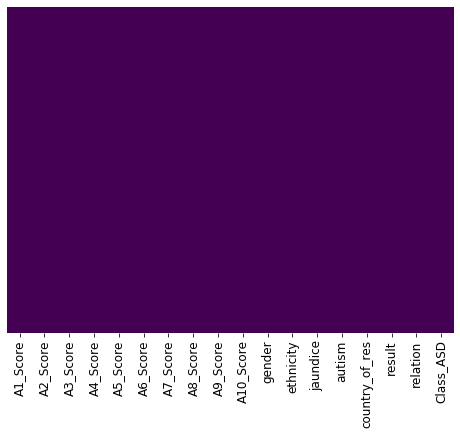

In [628]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

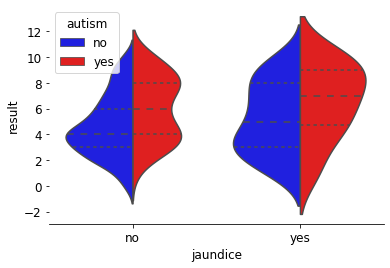

In [629]:
sns.violinplot(x="jaundice", y="result", hue="autism", data=data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

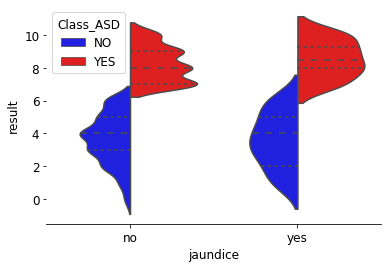

In [631]:
sns.violinplot(x="jaundice", y="result", hue="Class_ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

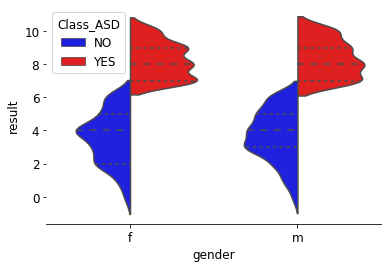

In [633]:
sns.violinplot(x="gender", y="result", hue="Class_ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


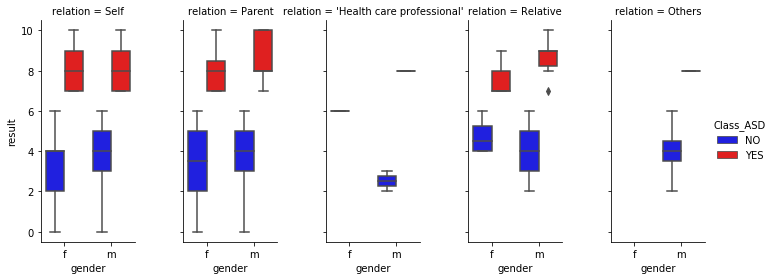

In [477]:
sns.factorplot(x="gender", y="result", hue="Class_ASD",
               col="relation", data=data, kind="box", size=4, aspect=.5 , palette={'YES': "r", 'NO': "b"});

In [479]:
data = data.drop(['age','used_app_before','age_desc'],axis = 1)
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jaundice,autism,country_of_res,result,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,f,White-European,no,no,'United States',6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,m,Latino,no,yes,Brazil,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,m,Latino,yes,yes,Spain,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,f,White-European,no,yes,'United States',6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,f,White-European,no,no,Egypt,2,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,0,0,0,0,0,1,1,0,1,m,White-European,no,no,Canada,3,Self,NO
700,0,0,0,0,0,0,0,1,0,0,m,White-European,no,no,Iraq,1,Self,NO
701,0,0,1,0,0,0,1,1,0,0,f,'Middle Eastern ',no,no,'New Zealand',3,Parent,NO
702,0,0,0,0,1,0,0,0,0,0,f,Asian,yes,no,India,1,Self,NO


In [522]:
#create X and Y dataset
y_dataset = data.iloc[:, 17]
X_dataset = data.iloc[:,: 17].select_dtypes(include=['object'])
X_numbers = data.select_dtypes(include=[np.number])


#Give labels and use df.apply() to apply le.fit_transform to all columns
le = preprocessing.LabelEncoder()
X_dataset_ohe = X_dataset.apply(le.fit_transform)
#y_dataset_ohe = y_dataset.apply(le.fit_transform)

In [523]:
y_dataset= le.fit_transform(y_dataset)
  
y_dataset

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

Splitting the Filled dataset

In [533]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_dataset_ohe)
X_onehotlabels = enc.transform(X_dataset_ohe).toarray()
X= np.hstack((X_onehotlabels,X_numbers))


#create the dataframe
x_dataframe = pd.DataFrame(X)
y_dataframe = pd.DataFrame(y_dataset)


# create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y_dataset, test_size=0.30,random_state=54)

# Analyzing the Train and Test data

In [534]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 358, 1: 134}

In [535]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 157, 1: 54}

# MODEL BUILDING AND TRAINING
DecisionTreeClassifier

In [635]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
y_pred_test = d_tree.predict(X_test)
y_pred_train = d_tree.predict(X_train)

print('Accuracy of Train data Using Decision Tree: %.2f' %accuracy_score(y_train, y_pred_train))
print('Accuracy of Test data Using Decision Tree: %.2f' %accuracy_score(y_test, y_pred_test))

Accuracy of Train data Using Decision Tree: 1.00
Accuracy of Test data Using Decision Tree: 1.00


[[140  17]
 [  9  45]]


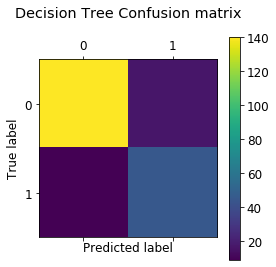

In [576]:
confusion = confusion_matrix(y_test, y_pred_test)
print(confusion)
# Show confusion matrix
plt.matshow(cm)
plt.title('Decision Tree Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [596]:
# use float to perform true division, not integer division
TPR= TP / float(FN + TP)

print(TPR)
print(metrics.recall_score(y_test,y_pred_test ))

0.8333333333333334
0.8333333333333334


In [582]:
FPR = FP / float(TN + FP)
print(FPR)

0.10828025477707007


In [579]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(d_tree,X, y_dataset, cv=10, scoring='roc_auc').mean()

1.0

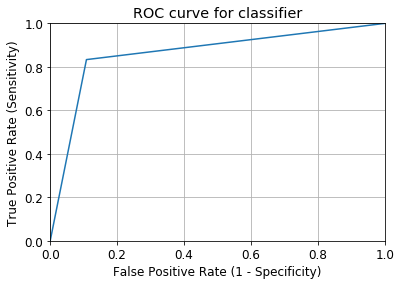

In [567]:
from sklearn import metrics
roc_curve = metrics.roc_curve(y_test, y_pred_test)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


LogisticRegression

Accuracy of Training data using Logistic Regression: 1.00
Accuracy of Test data using Logistic Regression: 0.97
[[153   4]
 [  2  52]]


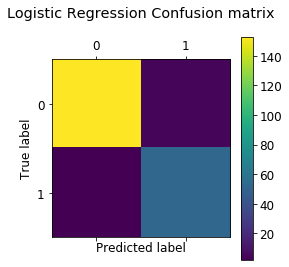

In [595]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(solver="liblinear", multi_class="auto")
regr.fit(X_train, y_train)
y_pred_test_lr = regr.predict(X_test)
y_pred_train_lr = regr_2.predict(X_train)

print('Accuracy of Training data using Logistic Regression: %.2f' %accuracy_score(y_train, y_pred_train_lr))
print('Accuracy of Test data using Logistic Regression: %.2f' %accuracy_score(y_test, y_pred_test_lr))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test_lr)
print(cm)
# Show confusion matrix
plt.matshow(cm)
plt.title('Logistic Regression Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [564]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(regr,X, y_dataset, cv=10, scoring='roc_auc').mean()

0.998127861130957

In [600]:
cm = confusion_matrix(y_test, y_pred_test_lr)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TPR= TP / float(FN + TP)

print(TPR)
FPR = FP / float(TN + FP)
print(FPR)

0.9629629629629629
0.025477707006369428


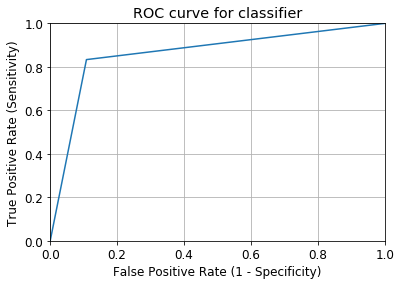

In [568]:
from sklearn import metrics
roc_curve = metrics.roc_curve(y_test, y_pred_test_lr)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

MULTINOMIAL NAIVE BAYES

In [637]:
# MULTINOMIAL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train, y_train)
y_pred_test1 = nb.predict(X_test)
y_pred_train = nb.predict(X_train)
print('Accuracy of Training data using NB: %.2f' %accuracy_score(y_pred_train,y_train))
print('Accuracy of Test data using NB: %.2f' %accuracy_score(y_pred_test1 ,y_test))


Accuracy of Training data using NB: 0.93
Accuracy of Test data using NB: 0.88


[[140  17]
 [  9  45]]


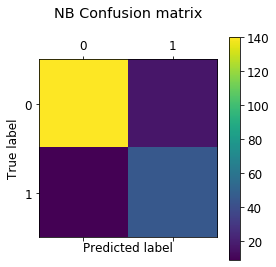

In [609]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test1)
print(cm)
# Show confusion matrix
plt.matshow(cm)
plt.title('NB Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [569]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(nb,X, y_dataset, cv=10, scoring='roc_auc').mean()

0.9574726786801089

In [610]:
cm = confusion_matrix(y_test,y_pred_test1)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TPR= TP / float(FN + TP)

print(TPR)
FPR = FP / float(TN + FP)
print(FPR)

0.8333333333333334
0.10828025477707007


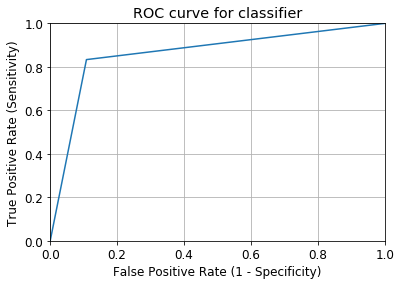

In [612]:
from sklearn import metrics
roc_curve = metrics.roc_curve(y_test, y_pred_test)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Model Evaluation:

In [636]:
print('Accuracy of Test data Using Decision Tree: %.2f' %accuracy_score(y_test, y_pred_test))
print('Accuracy of Test data using Logistic Regression: %.2f' %accuracy_score(y_test, y_pred_test_lr))
print('Accuracy of Test data using NB: %.2f' %accuracy_score(y_pred_test1 ,y_test))

Accuracy of Test data Using Decision Tree: 1.00
Accuracy of Test data using Logistic Regression: 0.97
Accuracy of Test data using NB: 0.88
